# EDA


In [2]:
import pandas as pd

# Load the dataset
file_path = "data/data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

(None,
    Bankrupt?   ROA(C) before interest and depreciation before interest  \
 0          1                                           0.370594          
 1          1                                           0.464291          
 2          1                                           0.426071          
 3          1                                           0.399844          
 4          1                                           0.465022          
 
     ROA(A) before interest and % after tax  \
 0                                 0.424389   
 1                                 0.538214   
 2                                 0.499019   
 3                                 0.451265   
 4                                 0.538432   
 
     ROA(B) before interest and depreciation after tax  \
 0                                           0.405750    
 1                                           0.516730    
 2                                           0.472295    
 3                       

The dataset contains 6819 entries with 96 columns, including 93 numerical (float64) features and 3 integer (int64) features. The target variable is "Bankrupt?", which indicates whether a Taiwanese company has gone bankrupt (1) or not (0).

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Rename columns by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for missing values
missing_values = df.isnull().sum().sum()

# Check for duplicate rows
duplicates = df.duplicated().sum()

# Get summary statistics
summary_stats = df.describe()

# Display basic insights
missing_values, duplicates, summary_stats


(np.int64(0),
 np.int64(0),
          Bankrupt?  ROA(C) before interest and depreciation before interest  \
 count  6819.000000                                        6819.000000         
 mean      0.032263                                           0.505180         
 std       0.176710                                           0.060686         
 min       0.000000                                           0.000000         
 25%       0.000000                                           0.476527         
 50%       0.000000                                           0.502706         
 75%       0.000000                                           0.535563         
 max       1.000000                                           1.000000         
 
        ROA(A) before interest and % after tax  \
 count                             6819.000000   
 mean                                 0.558625   
 std                                  0.065620   
 min                                  0.000000   


## Initial Findings from Data Cleaning & Preprocessing
No Missing Values: The dataset does not contain any missing values.
No Duplicate Rows: There are no duplicate entries.
Summary Statistics:
The dataset contains mostly numerical variables.
The target variable (Bankrupt?) is binary (0 or 1).
Many variables have values between 0 and 1, likely representing ratios.
Some variables have extreme values (e.g., Total assets to GNP price has a very large max value).

C:\Users\chank\AppData\Local\Temp\ipykernel_26764\3999773980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Bankrupt?"], palette="viridis")


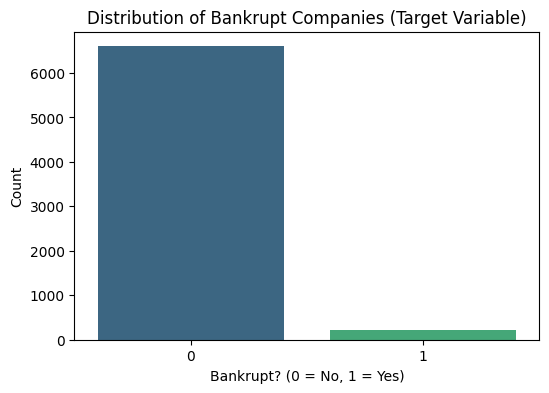

Bankrupt?
0    96.77372
1     3.22628
Name: proportion, dtype: float64

In [4]:
# Plot the distribution of the target variable "Bankrupt?"
plt.figure(figsize=(6,4))
sns.countplot(x=df["Bankrupt?"], palette="viridis")
plt.title("Distribution of Bankrupt Companies (Target Variable)")
plt.xlabel("Bankrupt? (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Get class distribution
class_distribution = df["Bankrupt?"].value_counts(normalize=True) * 100
class_distribution


## Class Imbalance Analysis
96.77% of companies did not go bankrupt (label = 0).
3.23% of companies went bankrupt (label = 1).
This is a highly imbalanced dataset, which means predictive models may struggle to identify bankrupt companies without special techniques such as:
Oversampling the minority class (e.g., SMOTE)
Undersampling the majority class
Adjusting class weights in the model

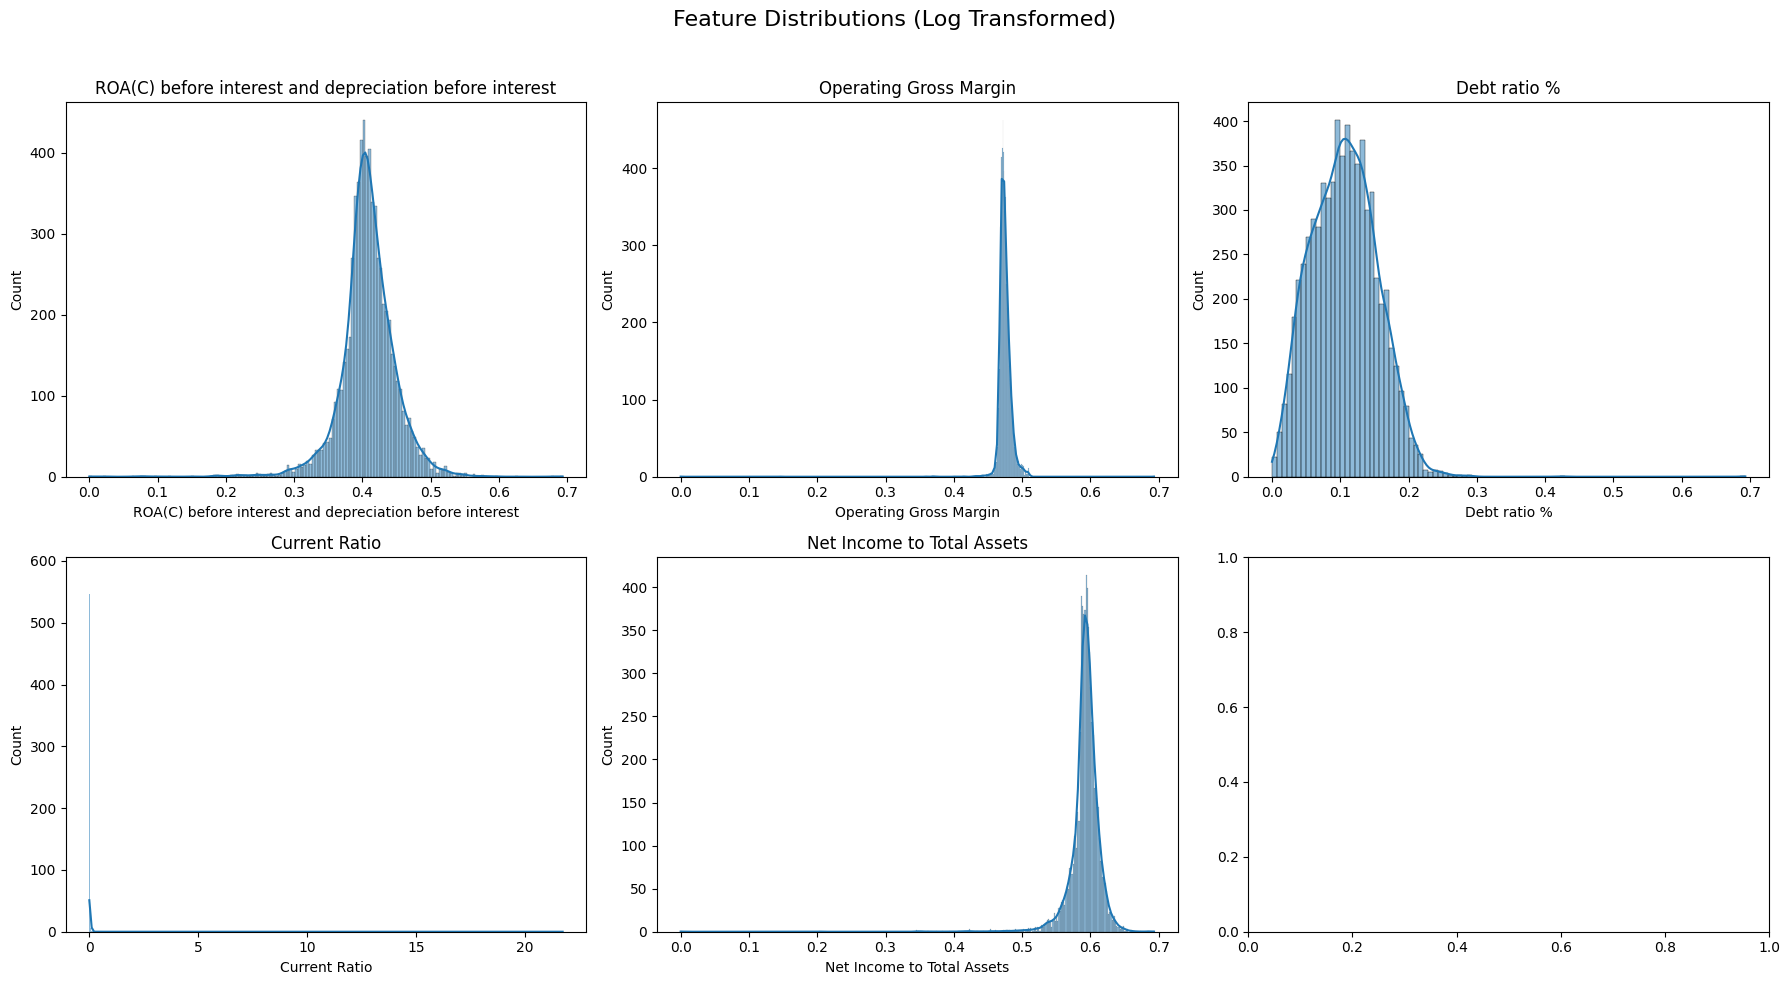

In [5]:
selected_features = [
    "ROA(C) before interest and depreciation before interest",
    "Operating Gross Margin",
    "Debt ratio %",
    "Current Ratio",
    "Net Income to Total Assets"
]


# Apply log transformation to avoid extreme values affecting the plots
df_log = df.copy()
for feature in selected_features:
    df_log[feature] = np.log1p(df[feature])  # log(1 + x) to handle zeros

# Plot histograms for selected features after transformation
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Feature Distributions (Log Transformed)", fontsize=16)

for i, feature in enumerate(selected_features):
    row, col = divmod(i, 3)
    sns.histplot(df_log[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Feature Distribution Insights (Log-Transformed)
Most financial ratios appear skewed, with many values clustered around 0 or small positive values.
Log transformation helped in spreading out values, making it easier to detect patterns.
Some features, such as Current Ratio and Debt Ratio %, still have a wide range.


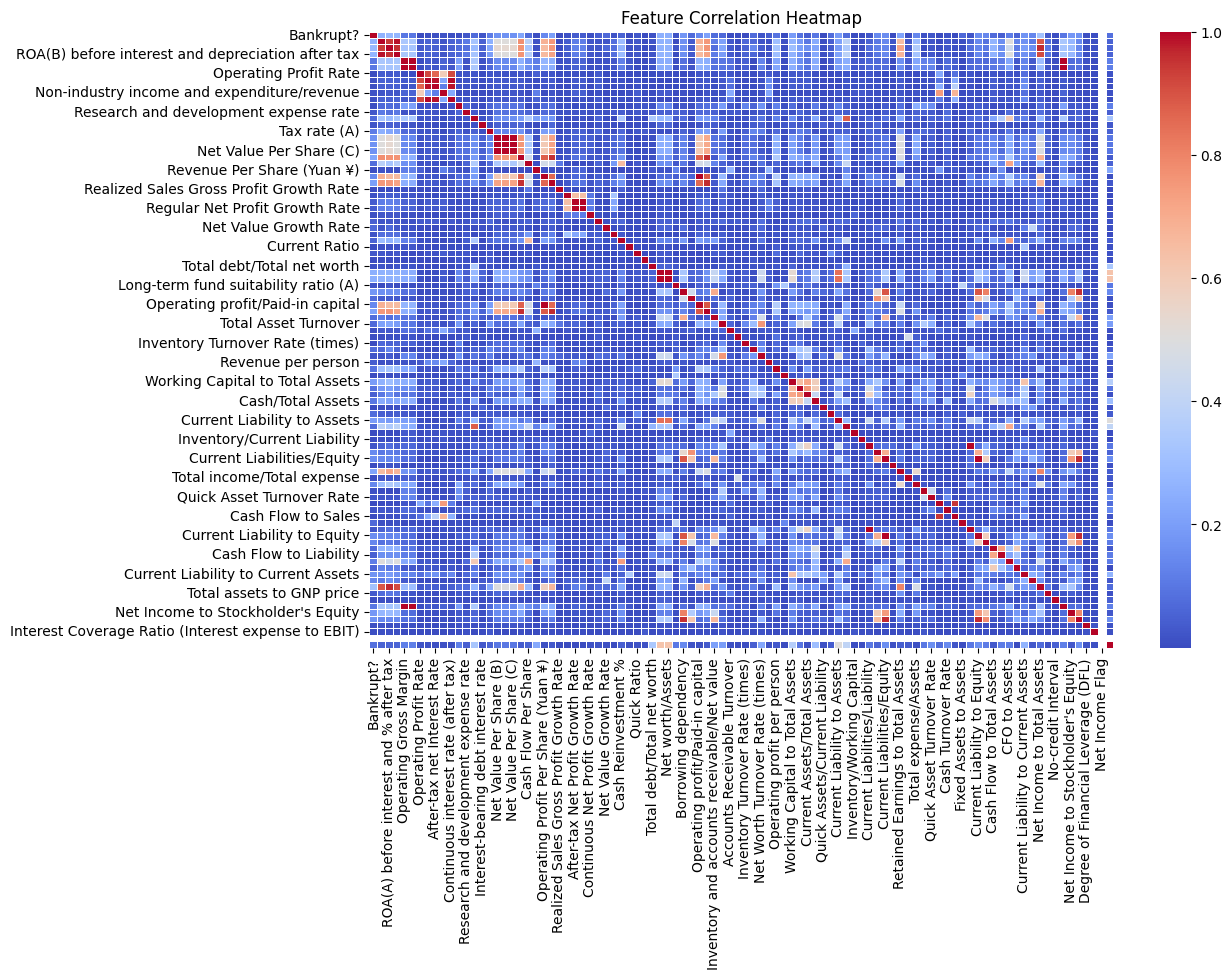

Net worth/Assets                      Debt ratio %                            1.000000
Debt ratio %                          Net worth/Assets                        1.000000
Operating Gross Margin                Gross Profit to Sales                   1.000000
Gross Profit to Sales                 Operating Gross Margin                  1.000000
Net Value Per Share (A)               Net Value Per Share (C)                 0.999837
Net Value Per Share (C)               Net Value Per Share (A)                 0.999837
Operating Gross Margin                Realized Sales Gross Margin             0.999518
Realized Sales Gross Margin           Operating Gross Margin                  0.999518
Gross Profit to Sales                 Realized Sales Gross Margin             0.999518
Realized Sales Gross Margin           Gross Profit to Sales                   0.999518
Net Value Per Share (A)               Net Value Per Share (B)                 0.999342
Net Value Per Share (B)               Net V

In [6]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of highly correlated features (absolute value > 0.7)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.abs(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify highly correlated features (threshold > 0.7)
high_corr_features = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_features = high_corr_features[high_corr_features != 1]  # Remove self-correlation

# Display top 10 highly correlated feature pairs
high_corr_features.head(20)


## Correlation Analysis Findings
- Several features are highly correlated (correlation > 0.99), meaning they provide redundant information.
### Examples:
- "Net worth/Assets" vs. "Debt ratio %" (Correlation = 1.00) → These are inversely related.
- "Operating Gross Margin" vs. "Gross Profit to Sales" (Correlation = 1.00) → Redundant features.
- "Net Value Per Share (A, B, C)" are nearly identical.
- "Operating Profit Per Share" vs. "Operating profit/Paid-in capital" (Correlation = 0.99).--

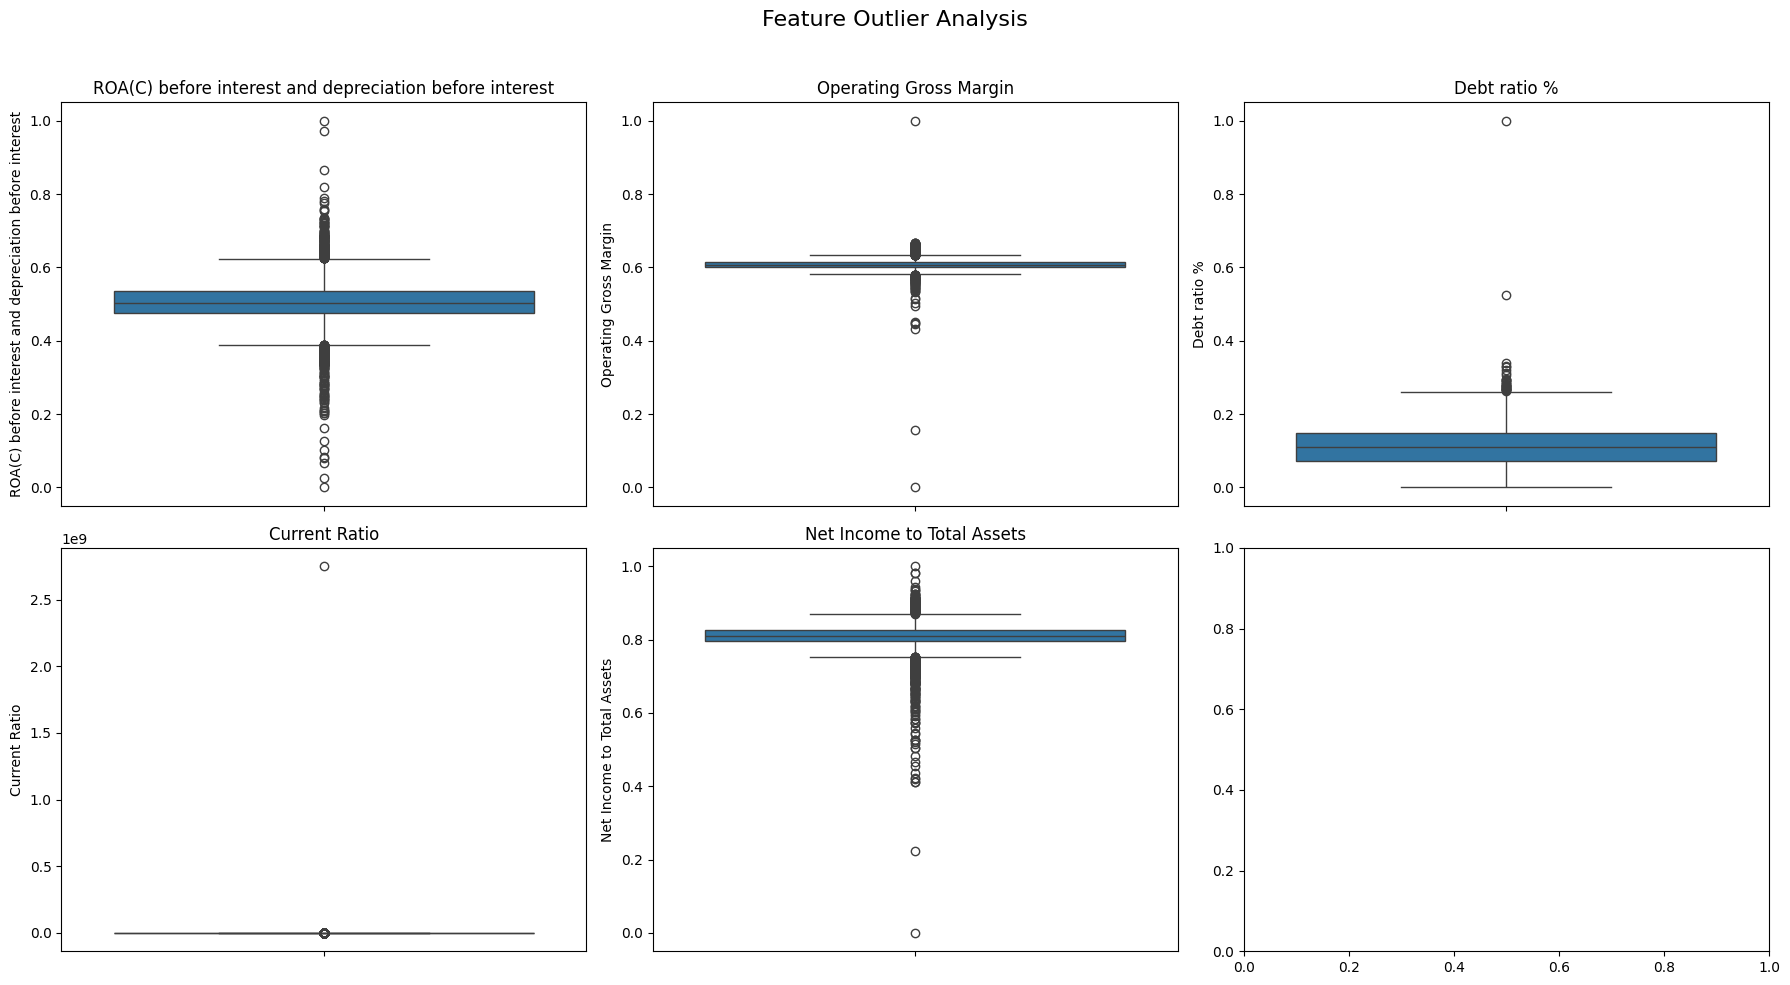

In [7]:
# Plot box plots for selected features to detect outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Feature Outlier Analysis", fontsize=16)

for i, feature in enumerate(selected_features):
    row, col = divmod(i, 3)
    sns.boxplot(y=df[feature], ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Outlier Analysis Findings
- Severe Outliers Present: Many features, including Debt Ratio %, Current Ratio, and Net Income to Total Assets, have extreme outliers.
### Possible Causes:
- Some financial metrics might be highly volatile for bankrupt companies.
- Accounting anomalies or data entry errors.
- Certain financial ratios naturally have skewed distributions (e.g., Debt Ratios in highly leveraged firms).- 

C:\Users\chank\AppData\Local\Temp\ipykernel_26764\1882410599.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="viridis")


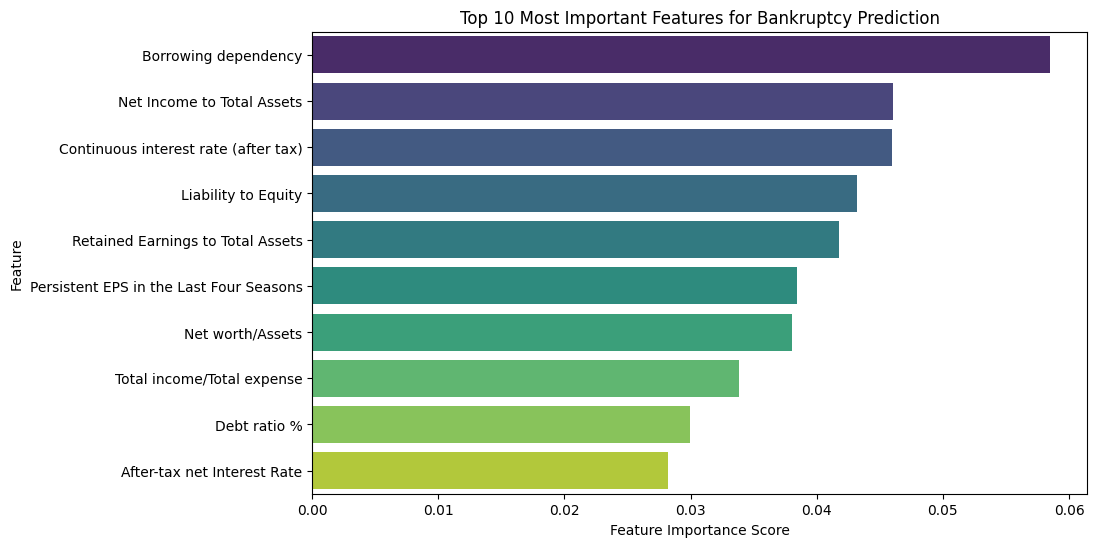

Borrowing dependency                       0.058508
Net Income to Total Assets                 0.046035
Continuous interest rate (after tax)       0.046000
Liability to Equity                        0.043181
Retained Earnings to Total Assets          0.041789
Persistent EPS in the Last Four Seasons    0.038471
Net worth/Assets                           0.038033
Total income/Total expense                 0.033817
Debt ratio %                               0.029915
After-tax net Interest Rate                0.028202
dtype: float64

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df.drop(columns=["Bankrupt?"])
y = df["Bankrupt?"]

# Standardize features (important for tree-based models with numerical ratios)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features for Bankruptcy Prediction")
plt.show()

# Display top 10 features
feature_importances.head(10)


## Key Feature Importance Findings
The top 10 most important features for predicting bankruptcy include:

- Borrowing dependency – How reliant a company is on borrowed funds.
- Continuous interest rate (after tax) – Cost of borrowing over time.
- Net Income to Total Assets – Profitability relative to assets.
- Liability to Equity – Measure of financial leverage.
- Retained Earnings to Total Assets – Indicates financial stability.
- Persistent EPS in the Last Four Seasons – Consistency of earnings per share.
- Total income/Total expense – Financial efficiency.
- Debt ratio % – Measures overall debt burden.
- Net worth/Assets – Financial health indicator.
- Equity to Liability – Debt-to-equity balance.- 

## Next Steps for Modeling
- Reduce Feature Redundancy – Many features are correlated (e.g., Debt Ratio %, Net worth/Assets).
- Handle Class Imbalance – Apply SMOTE (Synthetic Minority Over-sampling Technique) or adjust class weights in models.
- Optimize Model Performance – Test different models (Logistic Regression, XGBoost, etc.) and hyperparameter tuning.


In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# Step 1: Remove highly correlated features
# We'll drop one of each pair of features with correlation > 0.98
correlation_threshold = 0.98
corr_matrix = df.corr().abs()

# Identify highly correlated pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]

print(f"Number of highly correlated features to drop: {len(to_drop)}")
print(f"Features to drop: {to_drop}")

# Drop correlated features
df_reduced = df.drop(columns=to_drop)
print(f"Shape after removing correlated features: {df_reduced.shape}")

# Step 2: Standardize numerical features
X = df_reduced.drop(columns=["Bankrupt?"])
y = df_reduced["Bankrupt?"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Oversampling bankrupt cases to 50% of majority class
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print(f"Original class distribution: {pd.Series(y).value_counts().to_dict()}")
print(f"Resampled class distribution: {pd.Series(y_resampled).value_counts().to_dict()}")

# Step 4: Apply PCA for dimensionality reduction (keeping 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_resampled)
print(f"Number of PCA components (95% variance): {X_pca.shape[1]}")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to retain 95% variance
pca_full = PCA().fit(X_resampled)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')  # Mark 95% variance line
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.legend()
plt.grid(True)
plt.show()


# Convert back to DataFrame
df_preprocessed = pd.DataFrame(X_pca)
df_preprocessed["Bankrupt?"] = y_resampled

# Display preprocessed dataset
print("\nPreprocessed Bankruptcy Data Summary:")
print(f"Final shape: {df_preprocessed.shape}")
print("\nFirst 5 rows of preprocessed data:")
print(df_preprocessed.head())

# Save preprocessed data to CSV
df_preprocessed.to_csv("data/preprocessed_data.csv", index=False)
print("\nPreprocessed data saved to 'data/preprocessed_data.csv'") 


Number of highly correlated features to drop: 12
Features to drop: ['ROA(B) before interest and depreciation after tax', 'Realized Sales Gross Margin', 'After-tax net Interest Rate', 'Continuous interest rate (after tax)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Regular Net Profit Growth Rate', 'Net worth/Assets', 'Operating profit/Paid-in capital', 'Current Liability to Liability', 'Current Liability to Equity', 'Gross Profit to Sales']
Shape after removing correlated features: (6819, 84)
Original class distribution: {0: 6599, 1: 220}
Resampled class distribution: {0: 6599, 1: 3299}
Number of PCA components (95% variance): 50

Preprocessed Bankruptcy Data Summary:
Final shape: (9898, 51)

First 5 rows of preprocessed data:
          0         1         2         3         4         5         6  \
0 -3.196661  3.927673 -0.912151 -2.019654  0.382006 -0.649038 -0.372662   
1  0.023488  0.368544 -0.611681 -3.128038 -0.063665  0.072479 -0.148176   
2 -0.869006  1.803025 -2.0

The preprocessed dataset is now ready, including:

- Removal of highly correlated features (correlation > 0.98).
- Standardization of numerical features for better model performance.
- Handling of class imbalance using SMOTE (increased bankrupt cases to 50% of non-bankrupt).
- Dimensionality reduction using PCA (retaining 95% of variance).